<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/25_2_YB_%EC%BB%A4%EB%A6%AC%ED%81%98%EB%9F%BC_%EB%B3%B5%EC%8A%B5(1_6%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 7-2주차 캐글 필사 과제 복습  
(https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic)

# EDA To Prediction (DieTanic)

## Part1: Exploratory Data Analysis(EDA)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath = '/content/drive/MyDrive/EWHA/ESAA/25-2 YB/train_EDA.csv'
data = pd.read_csv(filepath)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isnull().sum() #전체 결측치 개수 확인

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age, Cabin, Embarked에 null 값 있으므로 데이터 전처리 필요.


### How many survived?

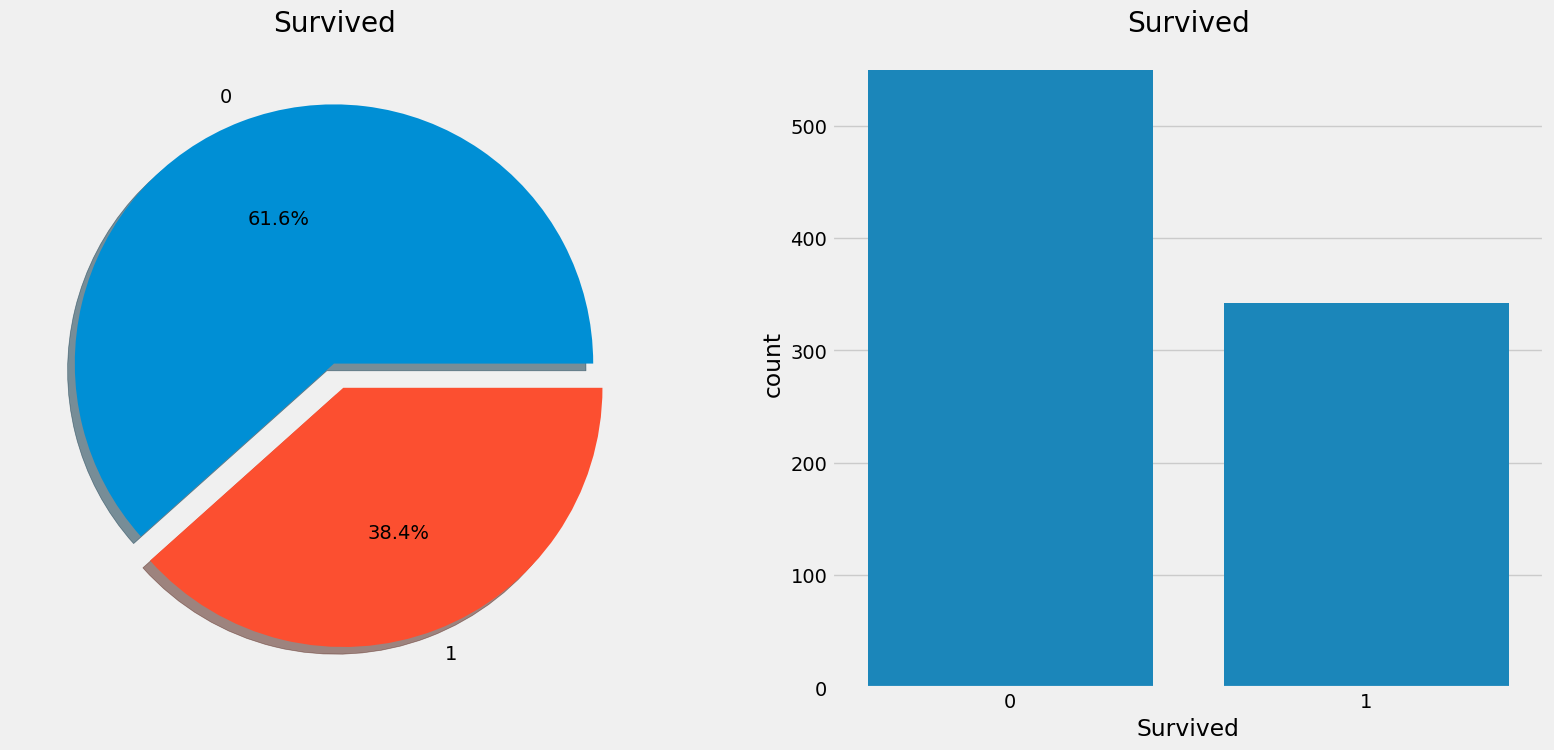

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1]) #Seaborn에서 plot에 인자를 전달할 때, 명시적으로 인자를 지정해야 함
ax[1].set_title('Survived')
plt.show()

어떤 카테고리의 승객이 살아남고 어떤 카테고리의 승객이 그러지 못했는지 분석하는 것이 목표.  
즉, 생존율 분석.

### Types Of Features 이해
- Categorical Features in the dataset: Sex,Embarked.
- Ordinal Features in the dataset: PClass
- Continous Features in the dataset: Age

## Analysing The Features
### Sex : categorical feature

In [10]:
data.groupby(['Sex','Survived'])['Survived'].count() #두 그룹별 생존자칼럼 수 확인

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

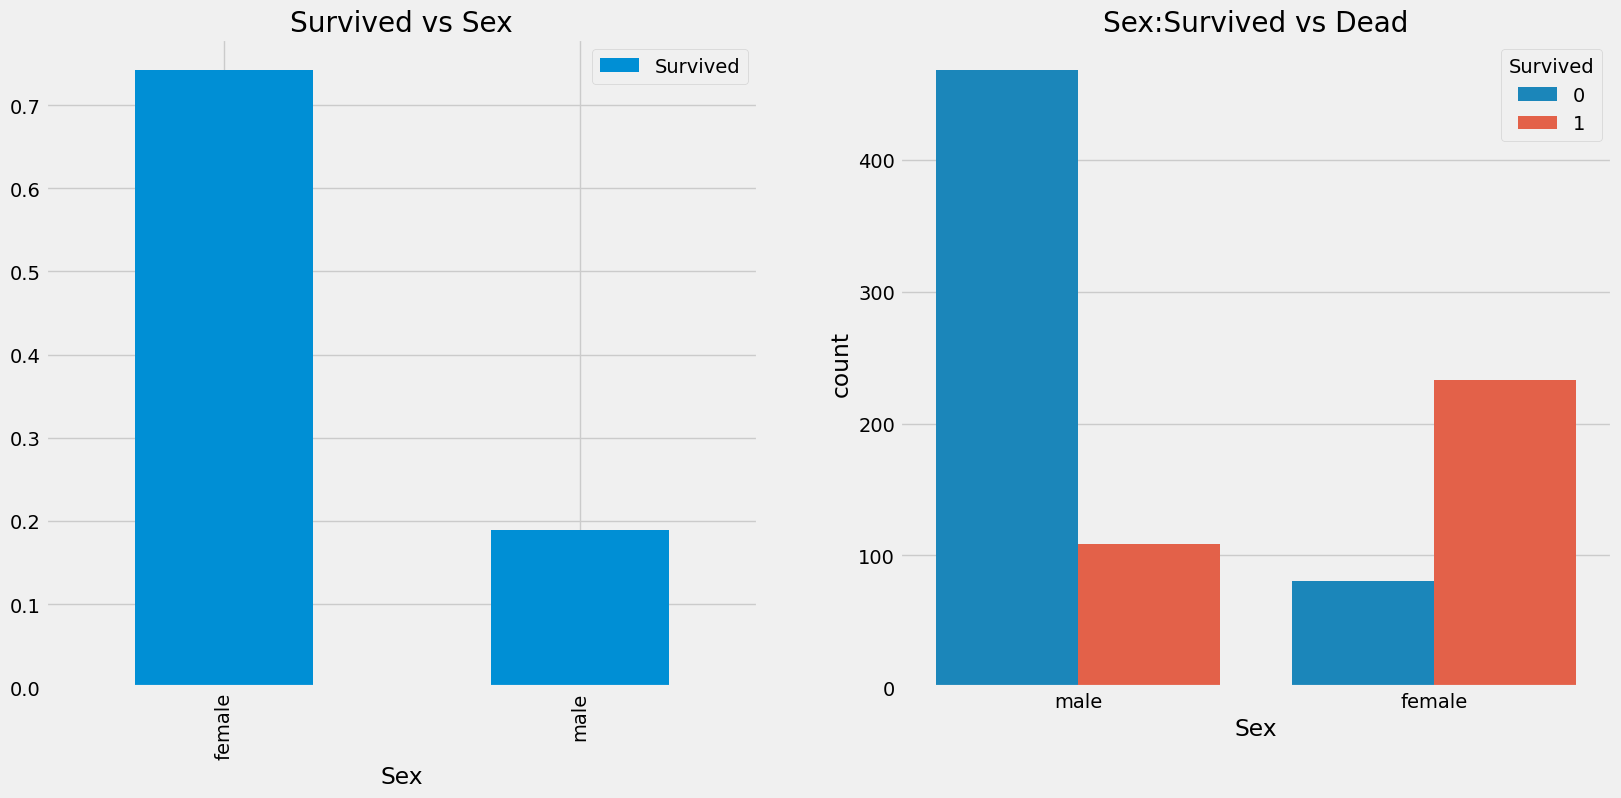

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

남성 탑승객이 더 많은데 여성 생존율이 더 높은 특이성 보임.  
'성별' 칼럼이 생존율에 매우 중요한 인자가 될 것으로 보임

### Pclass : ordinal feature

In [11]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


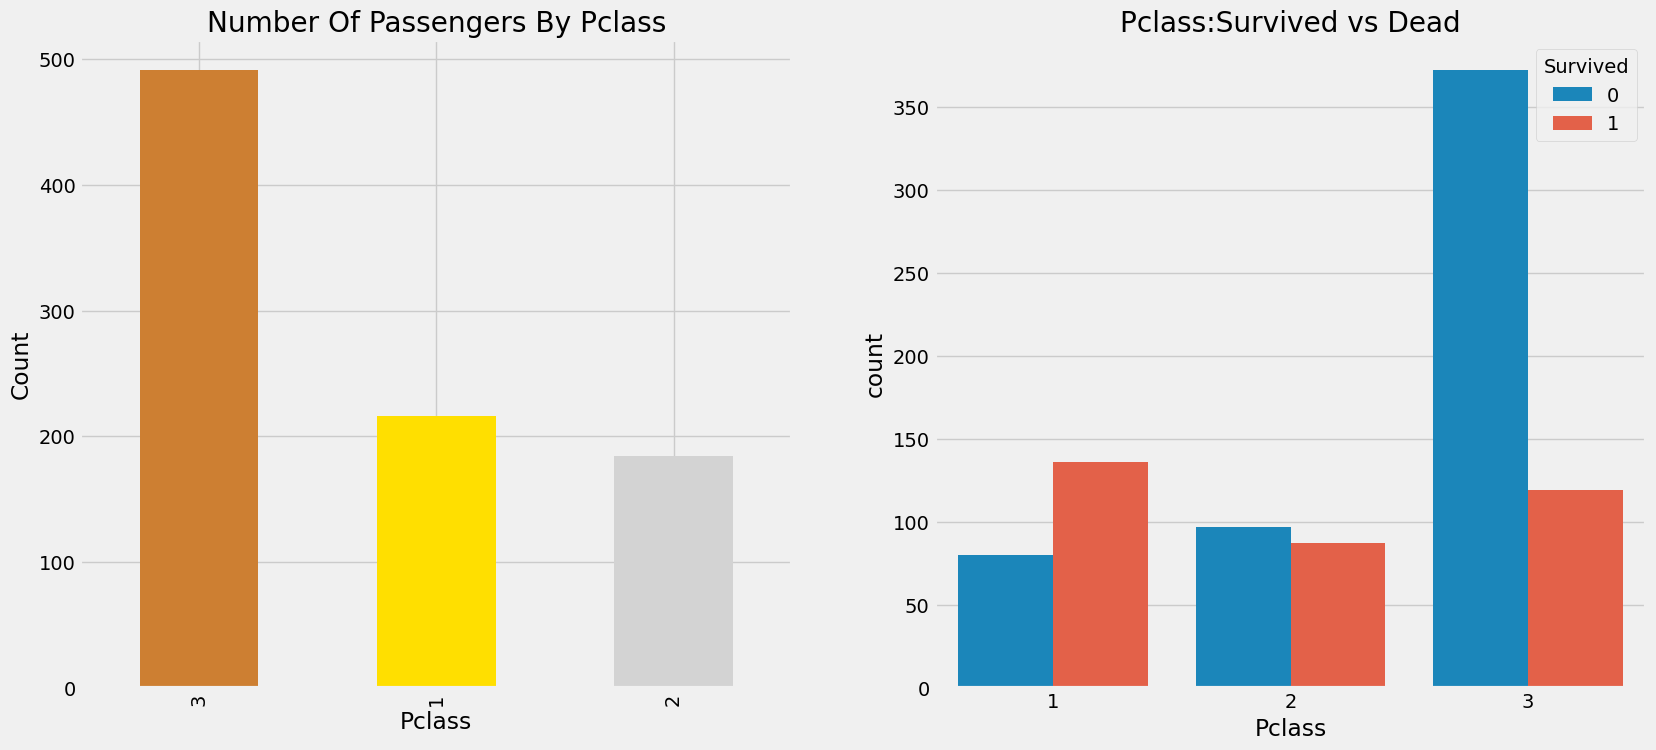

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

3등급 객실 이용자 수가 제일 많은데 생존율은 반대임.  
'등급'도 관련 있어 보임.

-> Sex, Pclass 같이 분석하기

In [15]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

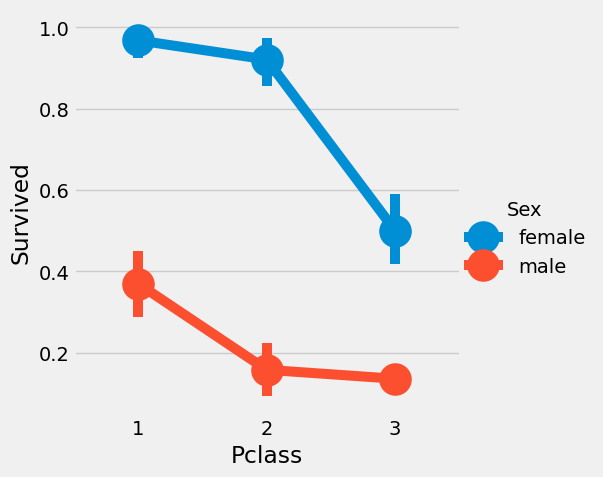

In [16]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data, kind='point')

plt.show()

Factor Plot 이용(Seaborn에서는 catplot이라 함)  
: 다양한 범주형 그래프 그려줌.
  
Sex, Pclass 연계해서 분석한 결과)  
확실히 1등급 객실 여성 생존율 가장 높음.  
일관적 경향성 보임.  
-> 두 변수가 생존율과 관련 커보임

### Age : continuous feature

In [17]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


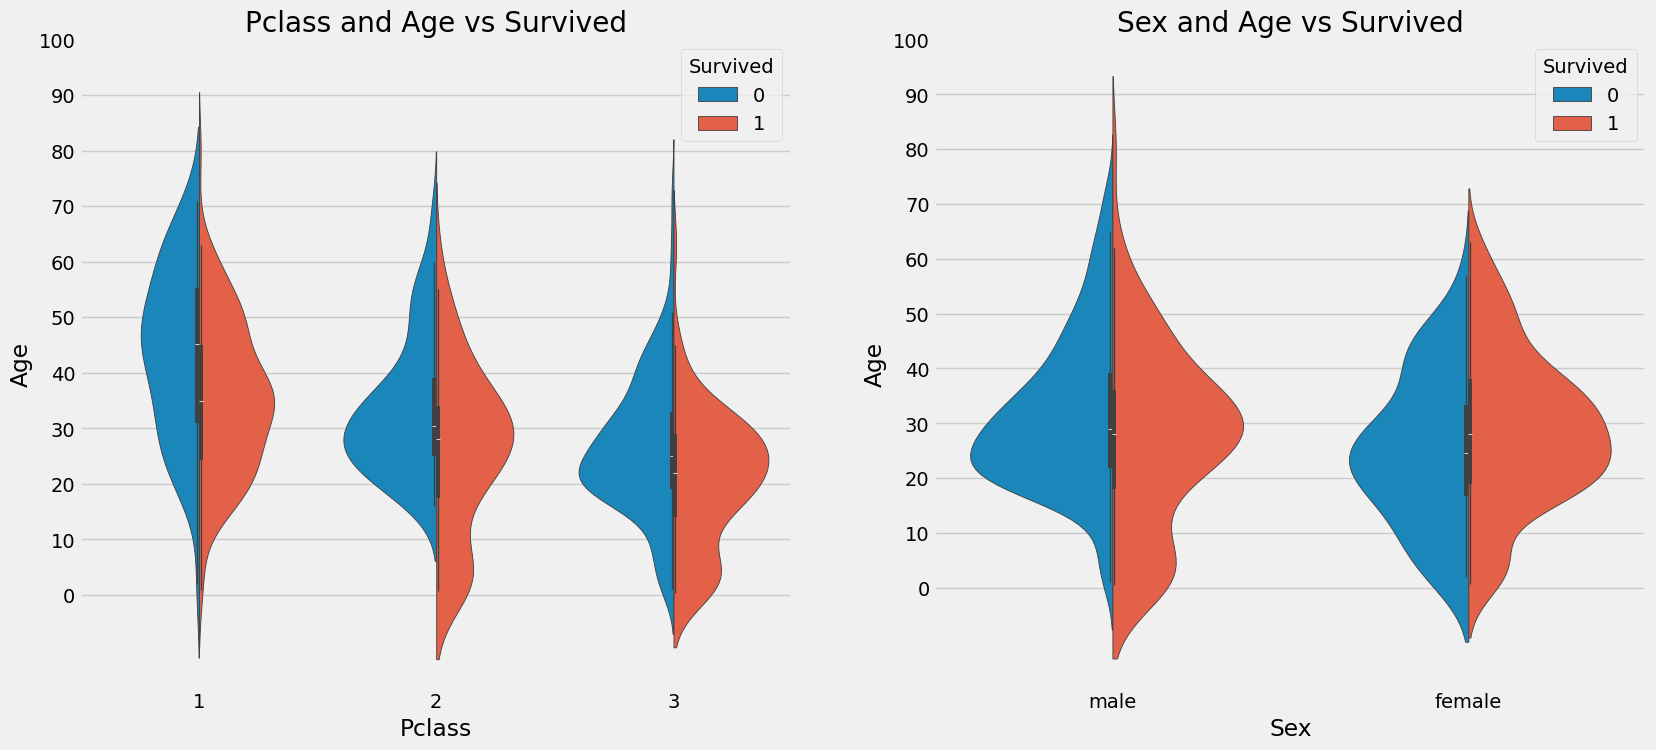

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1. P클래스 증가할 때 어린이의 수가 증가, 10세 미만의 승객(어린이)의 생존율은 P클래스에 관계없이 양호함
2. Pclass1에서 20-50세 사이의 생존 확률은 높음. 특히 여성에서 더 높음
3. 남성: 나이가 들수록 생존 확률이 감소

### 나이 결측치 처리
단순히 평균으로 대체하면, 어린이/어른 간의 상관관계 오류 커짐

Name 피처 확인해서 Mr, Mrs 여부 확인, 평균값 대체

In [19]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [20]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle or Mme 등 오탈자 고려해 수동으로 대체


In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


Filling NaN Ages

In [24]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [27]:
data.Age.isnull().any() #이제 결측치 없을 것

np.False_

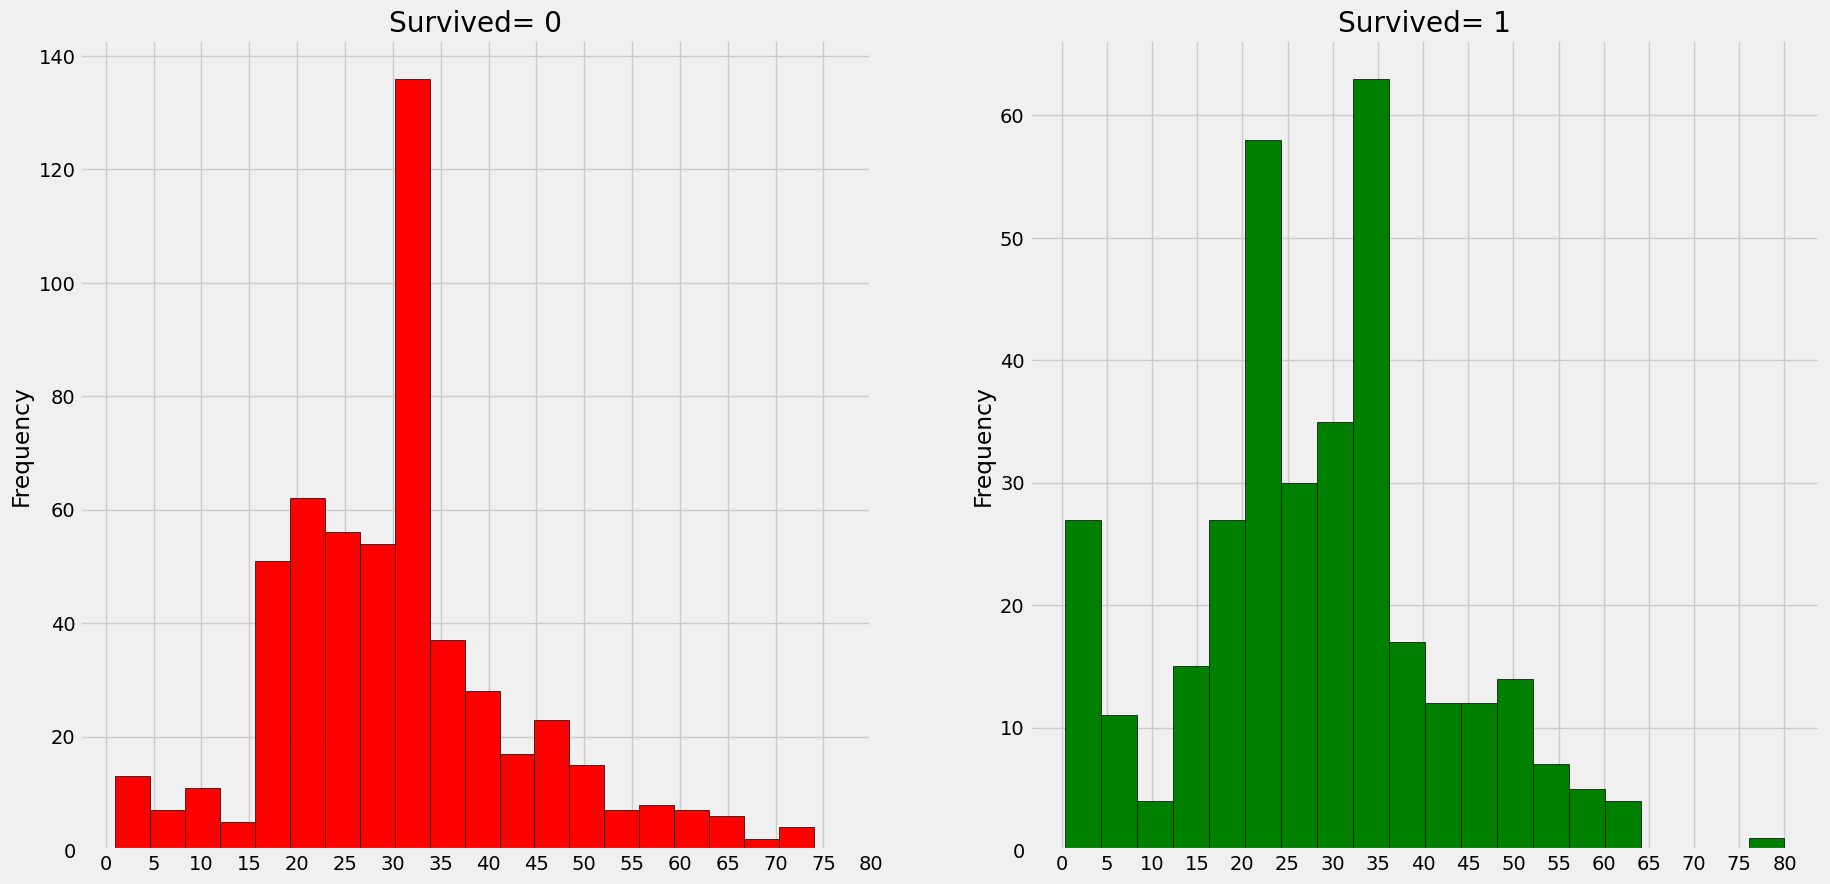

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

1. 유아(5세 미만)는 많이 구조됨.(여성 및 아동 우선 구조 경향).

2. 가장 나이 많은 승객이 구조됨(75-80살).

3. 최대 사망자 수는 30~40세 연령대임.

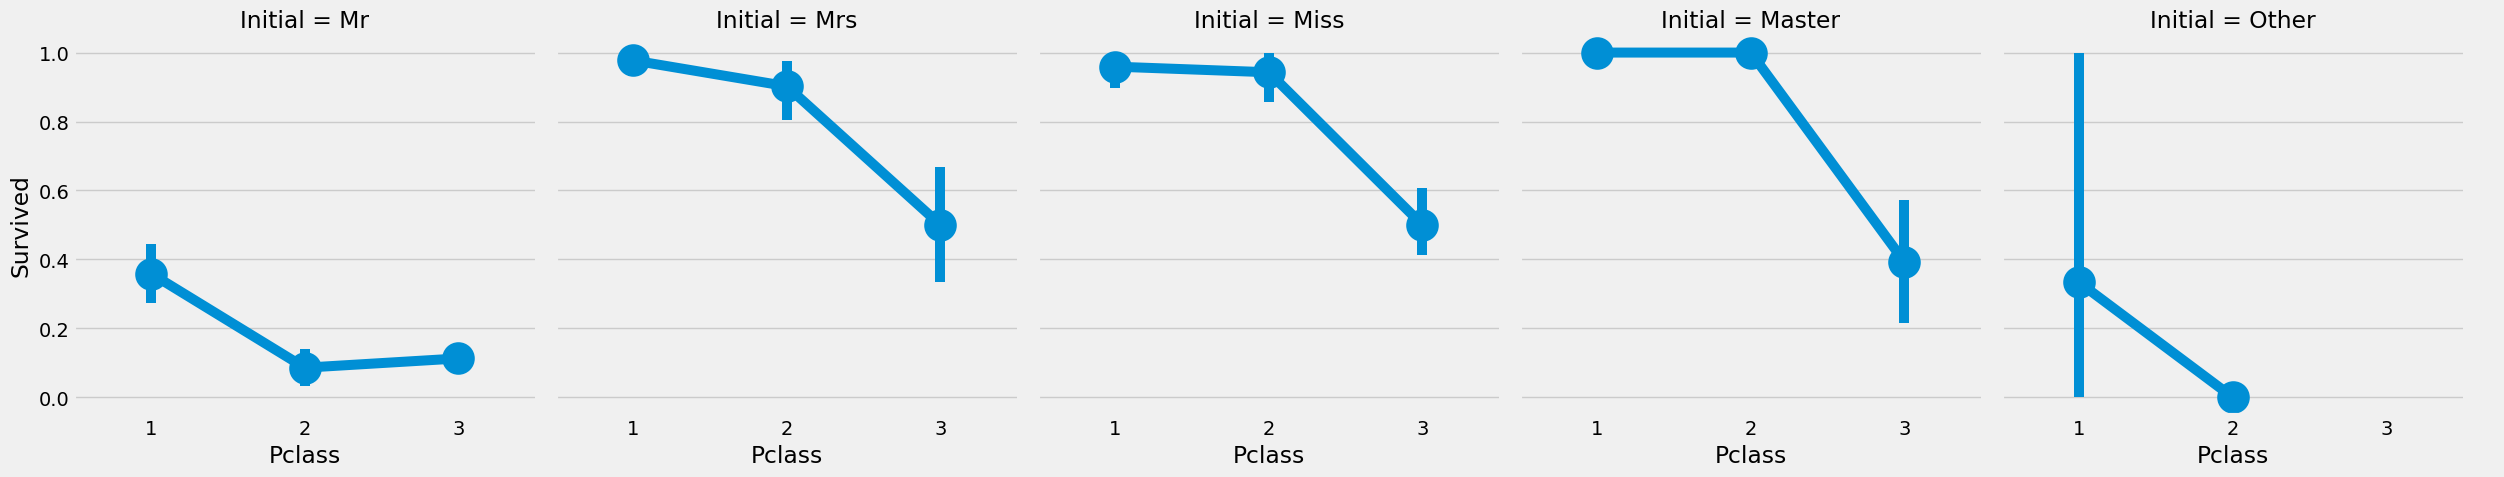

In [28]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind='point')

plt.show()

### Embarked : Categorical value

In [29]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

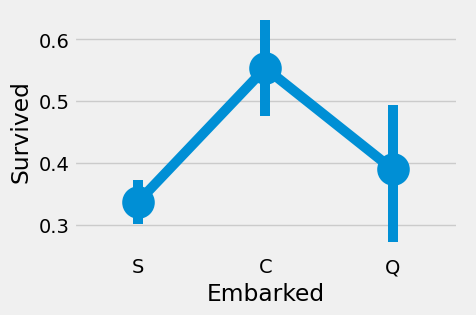

In [31]:
sns.catplot(x='Embarked',y='Survived',data=data, kind='point')

fig=plt.gcf()

fig.set_size_inches(5,3)

plt.show()

C가 가장 높고, S가 가장 낮음

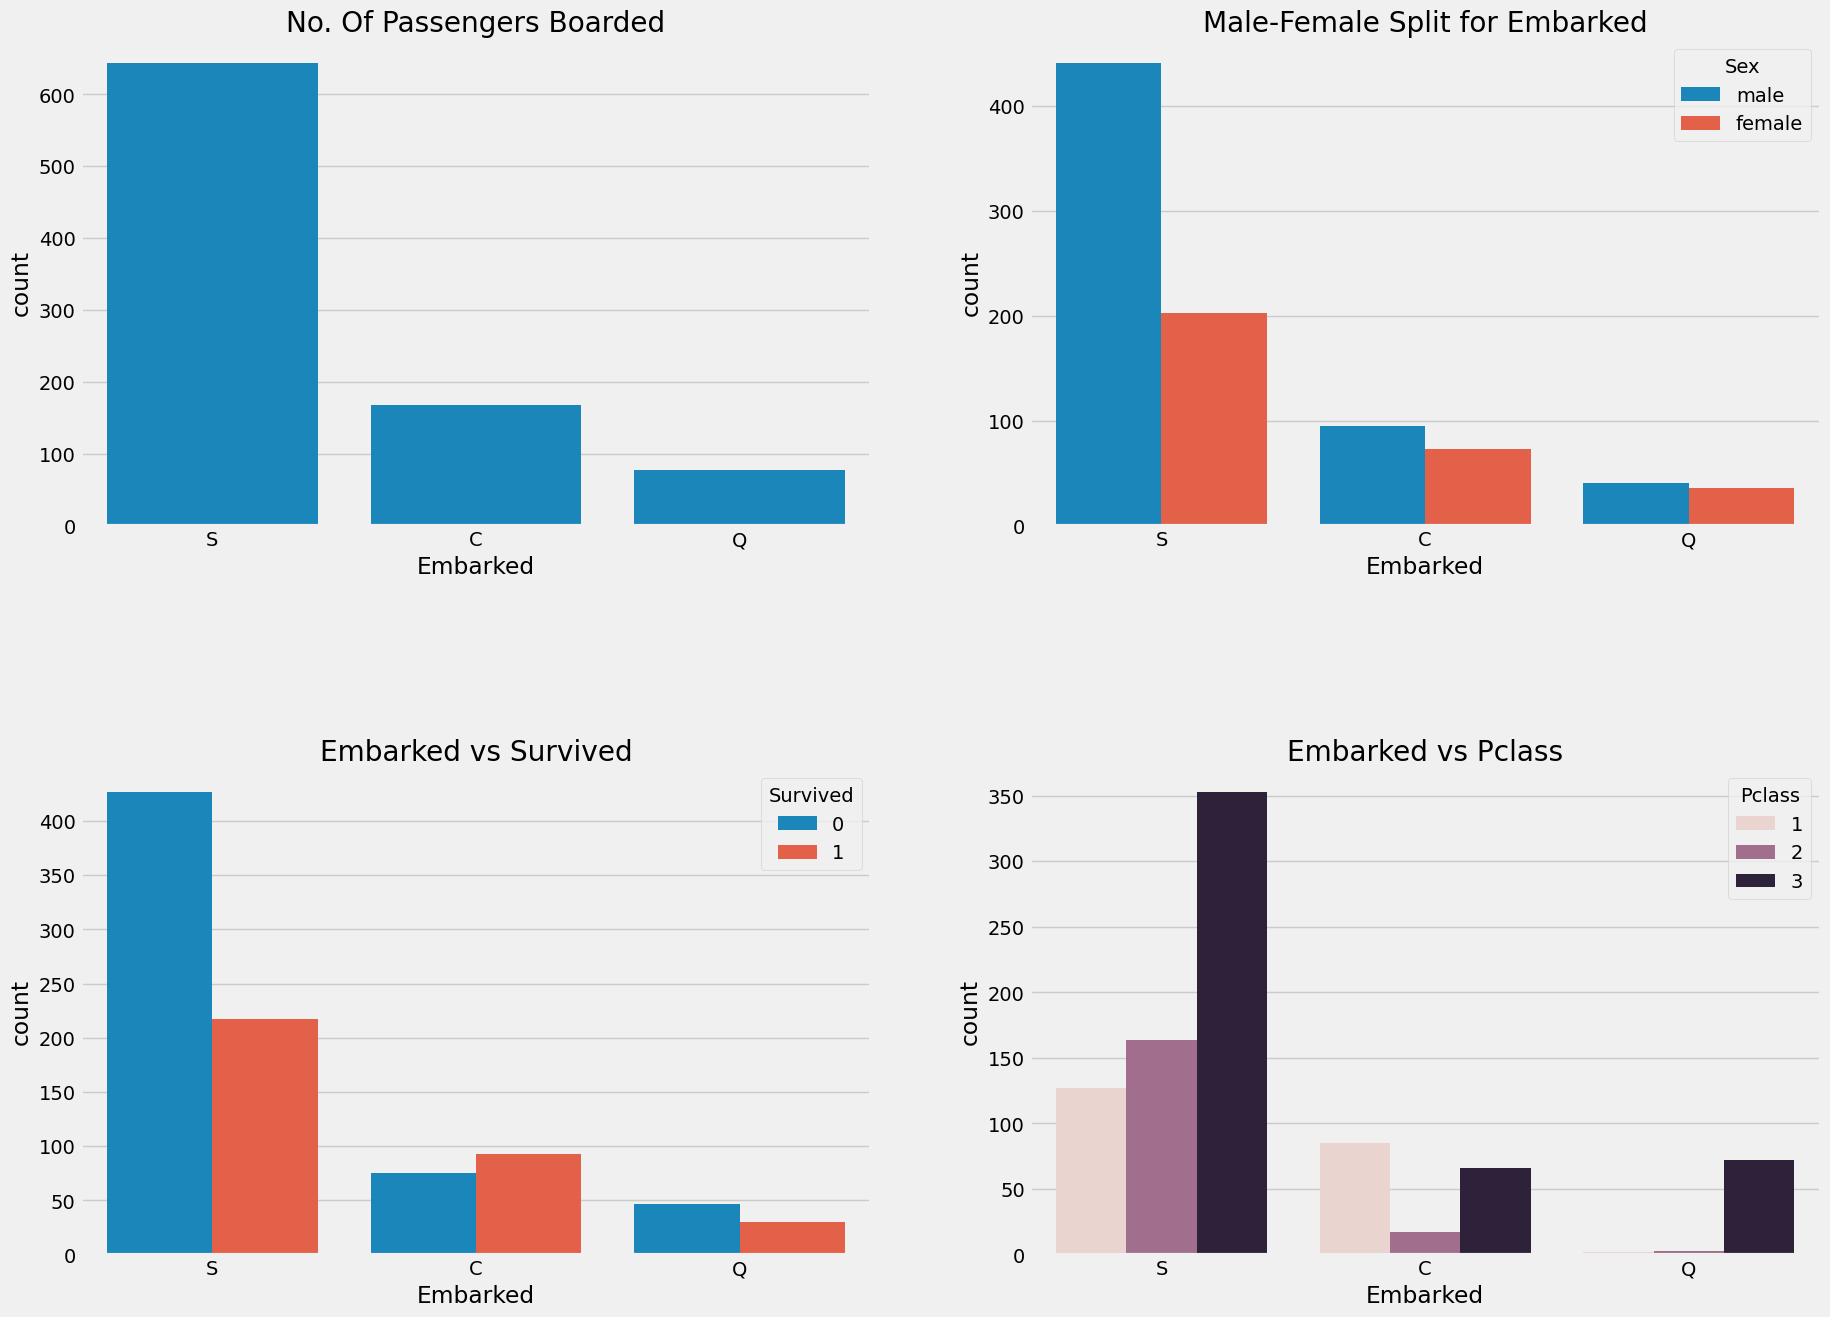

In [32]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1. S 에서 제일 많이 탑승. 그 중 대부분 Pclass3에서 탑승

2. C 승객들은 많은 비율이 살아남았음. 아마도 모든 Pclass1 및 Pclass2 승객들을 구출했기 때문일 것.

3. S는 대부분의 부유층이 탑승. 하지만 약 81%의 Pclass3 승객이 생존하지 못했기 때문에 생존 가능성은 낮음.

4. Q 승객의 거의 95%가 Pclass3

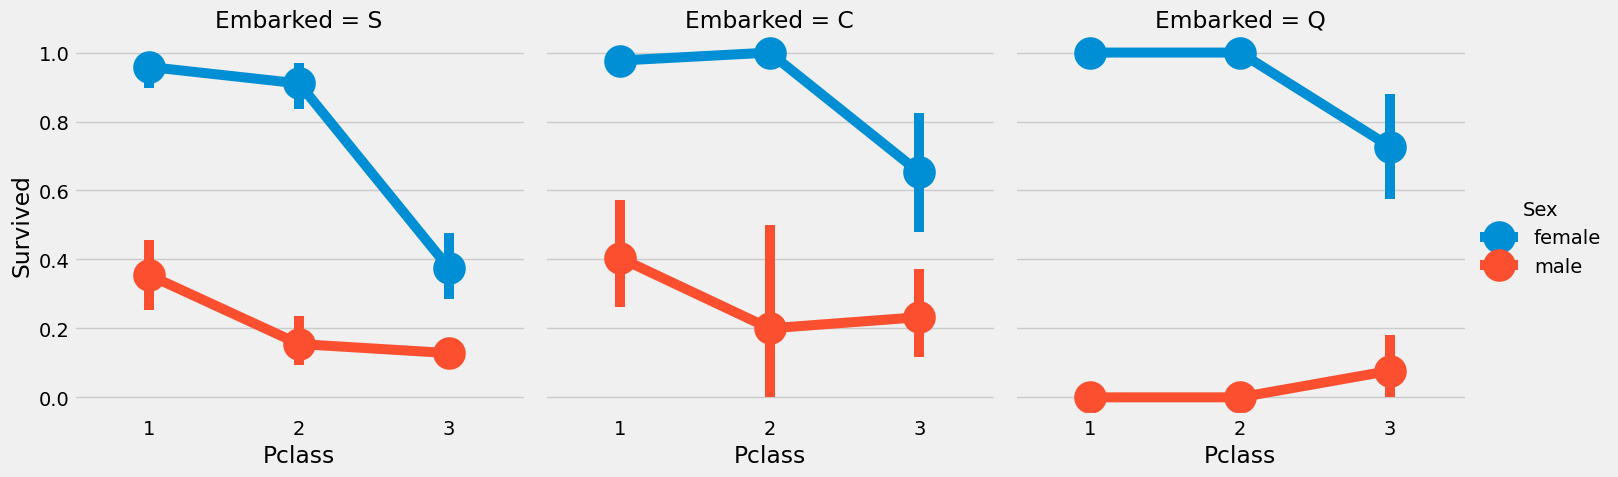

In [33]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind='point')

plt.show()

1. 여성의 생존 확률은 P클래스 1과 P클래스 2에 관계없이 거의 1

2. S는 남성과 여성 모두의 생존율이 매우 낮음. 특히 Pclass3 승객 생존율 매우 낮음.(돈 문제)

3. Q는 거의 모두 P클래스 3 출신이었음. 남성들 생존율 가장 낮아보임.

Filling Embarked NaN  
: S에서 가장 많이 탑승하므로 S로 대체

In [34]:
data['Embarked'].fillna('S',inplace=True)

In [35]:
data.Embarked.isnull().any()# Finally No NaN values

np.False_

### Sibsip : Discrete feature

혼자 탑승했는지, 가족 구성원 동반했는지

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [36]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


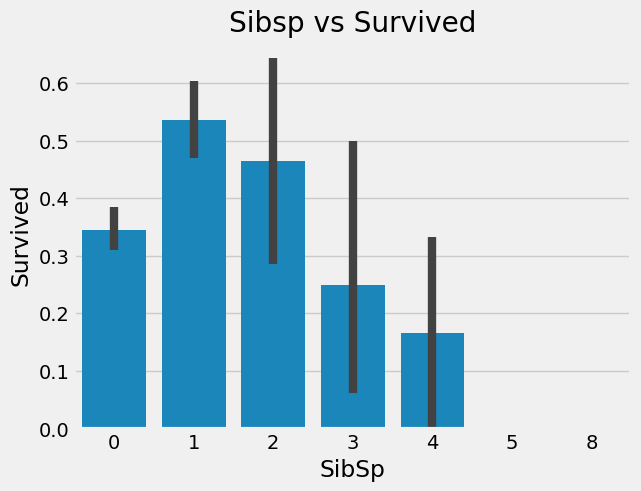

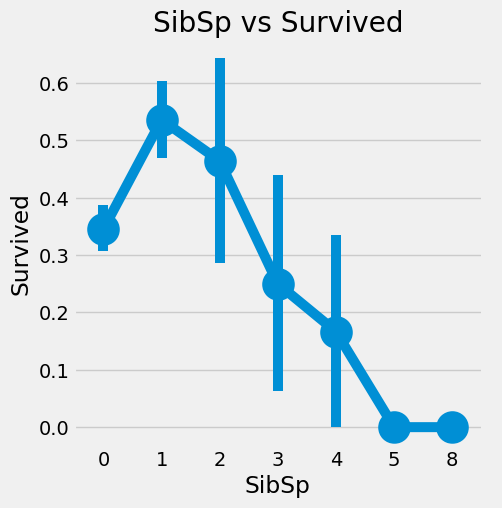

In [37]:

# catplot은 subplot이 Axes 위에 직접 그릴 수 없으므로 subplot 안에 직접 넣을 수 없음
sns.barplot(x='SibSp',y='Survived',data=data)
plt.title('Sibsp vs Survived')
sns.catplot(x='SibSp',y='Survived',data=data, kind='point')
plt.title('SibSp vs Survived')
plt.show()

In [38]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


혼자 탑승 / 형제 없을 때 34.5% 생존율.  
가족 수가 늘어날수록 생존율 하락(가족을 살리려고 하므로)

대가족은 Pclass3에 탑승, 모두 사망함.

### Parch


In [39]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


대가족은 Pclass3에 탑승

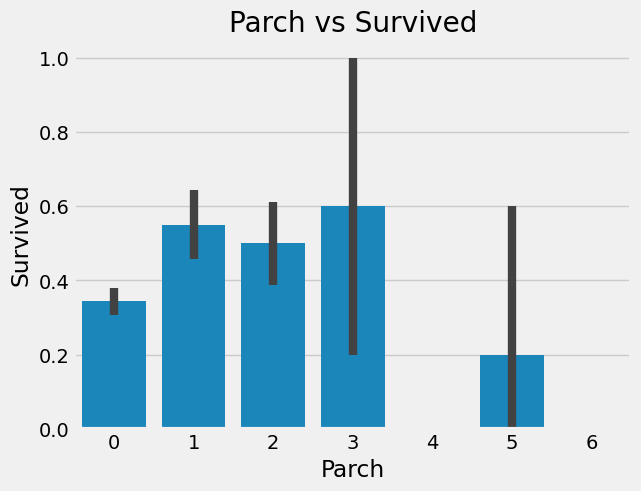

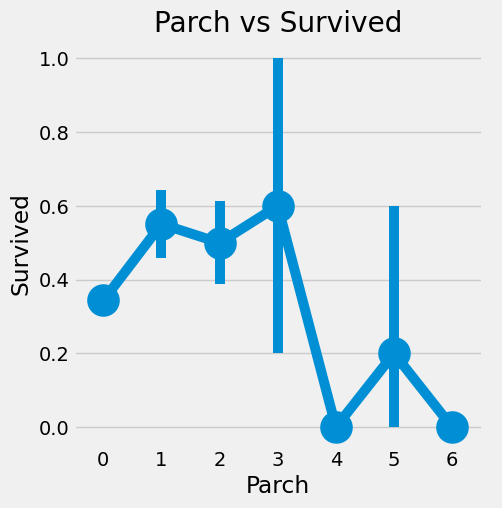

In [40]:
sns.barplot(x='Parch',y='Survived',data=data)

plt.title('Parch vs Survived')

sns.catplot(x='Parch',y='Survived',data=data, kind='point')

plt.title('Parch vs Survived')

plt.show()

1-3 parents가 있을 때 생존율 높음  
4 이상일 때는 생존율 하락.


### Fare : Continuous

In [41]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


Lowest Fare가 0.0이다!

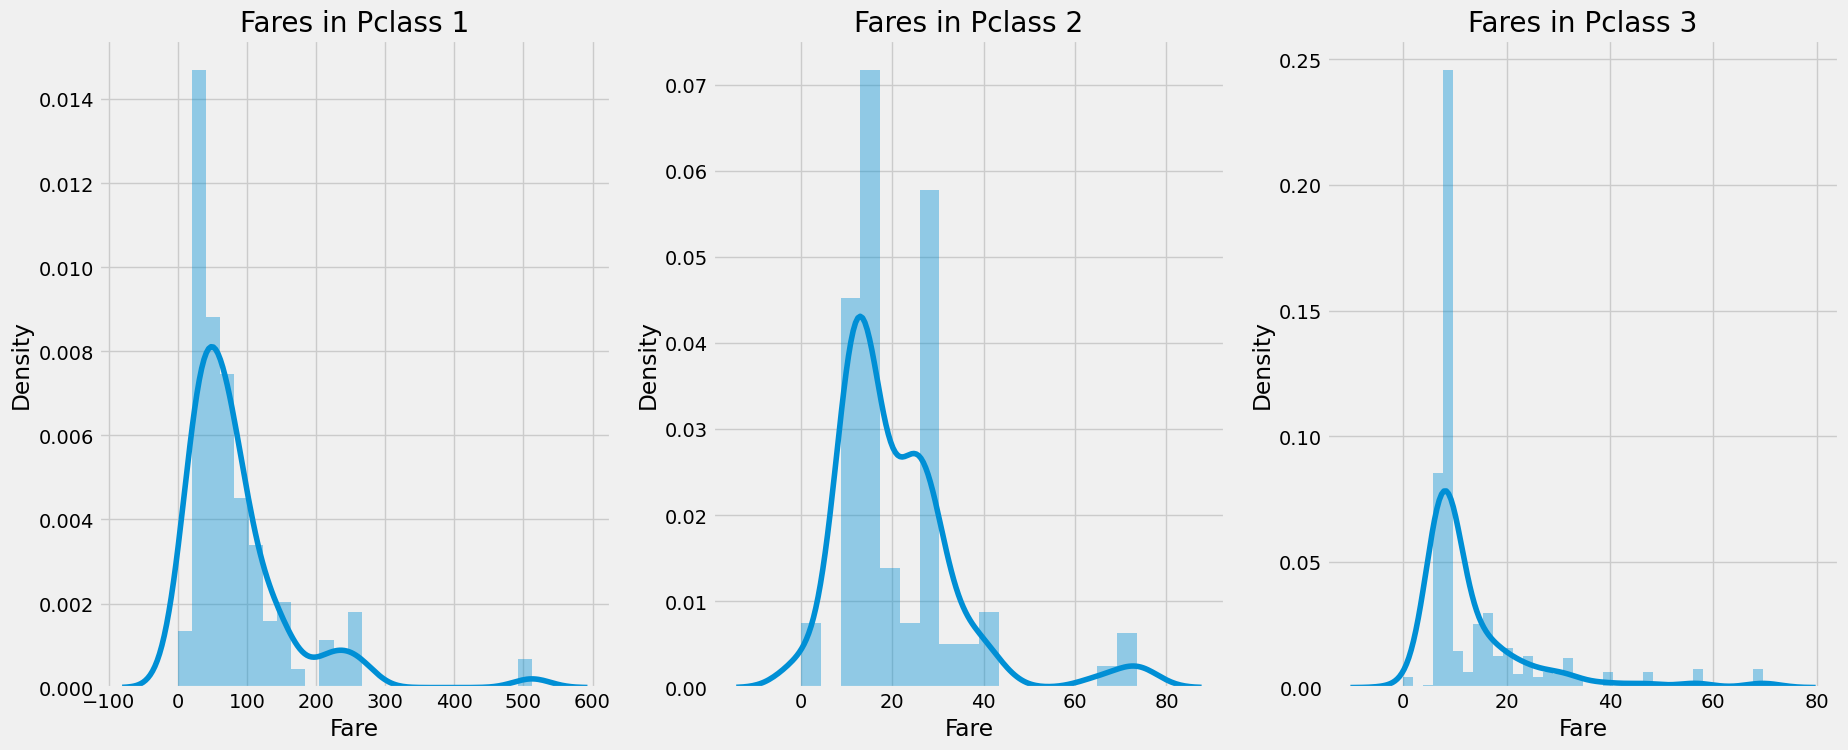

In [42]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1 승객의 fare 분포...
연속형 자료를 binning으로 discrete 자료로 바꾸기

### Observations in a Nutshell for all features:

Sex:여성 생존율이 남자보다 높음.

Pclass: 1등급 객실 승객 생존율이 높음. 3등급은 매우 낮음.  
특히 여성의 경우 1등급 승객 거의 생존, 2등급 생존율 매우 높은 편

Age: 5-10살 어린이들 생존율 높음. 15-35살 승객이 많이 사망함.

Embarked: C 항구 승객 생존율 높음 (1등급 승객의 대부분이 S에서 탑승했음에도)  
Q 항구 탑승객의 모두 3등급 승객

Parch+SibSp: 1-2명의 가족이나, 1-3명의 부모님과 함께 탑승 시 생존율 높음  
혼자 탑승하거나 대가족 승객은 사망율 높음


##  Correlation Between The Features


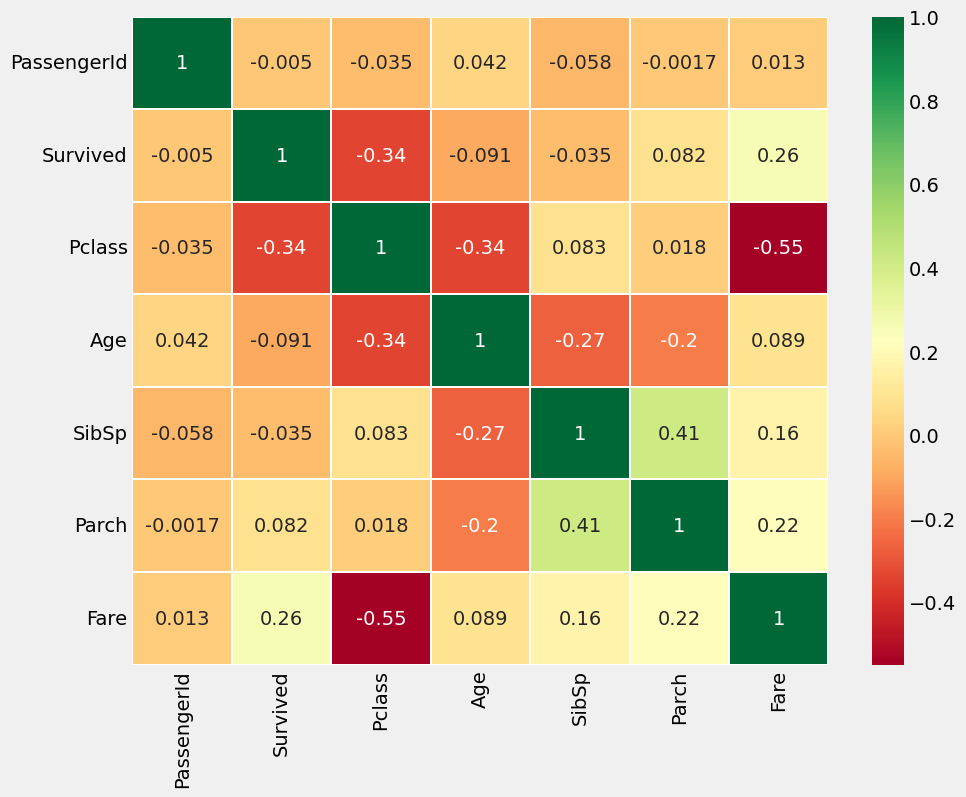

In [43]:
cols = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
sns.heatmap(data[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

히트맵 해석)  
숫자형 자료에서만 명확한 상관관계 파악 가능 ...

MultiColinearity : 두 피처가 매우 비슷한 자료를 내포.
둘 중 하나는 redundant.  
redundant features를 제거해야 훈련 시간 등을 줄이는 이점 있음.

위 자료에서는 ...  
SibSp, Parch간 0.41의 상관관계가 가장 높음.  



# Part2: Feature Engineering and Data Cleaning

모든 피처가 중요한 게 아님! Rebundant 피처를 제거해야하고, 새로운 피처를 가져오거나 추가해야함.




## Age_band

Age는 연속형 자료임. 연속형 자료는 머신러닝모델에 문제가 있음 ... binning이나 N 정규화를 통해 카테고리형 자료로 변경 필요.  


In [44]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [45]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


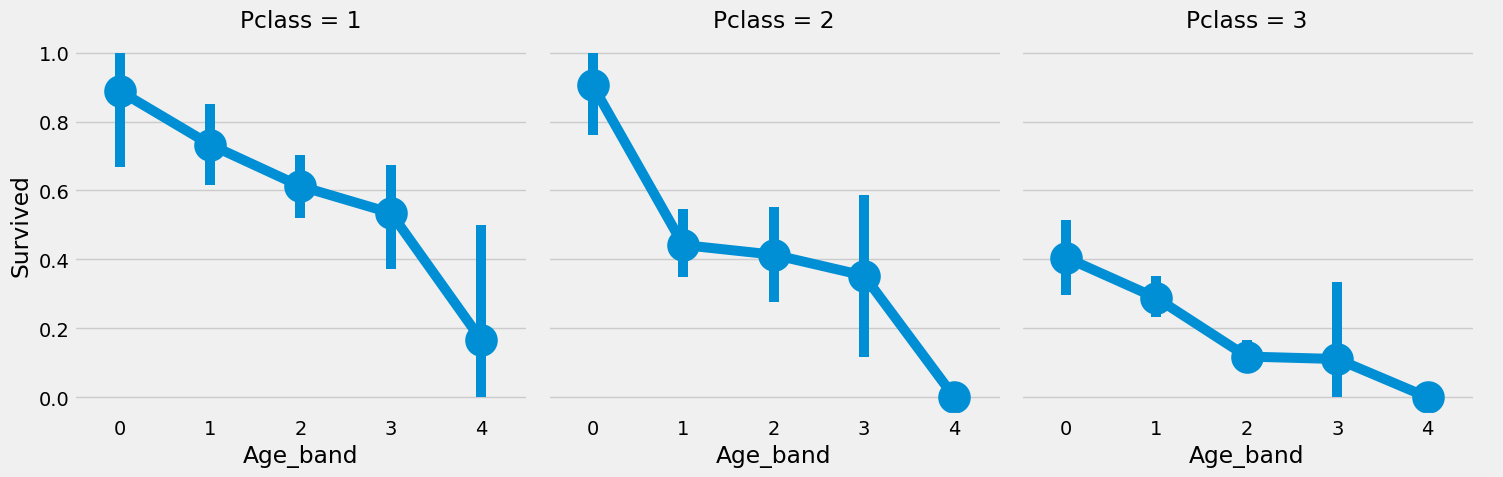

In [46]:
sns.catplot(x='Age_band',y='Survived',data=data, col='Pclass', kind='point')

plt.show()

나이와 생존율 연관성 직관적 확인 가능.  

## Family size and alone



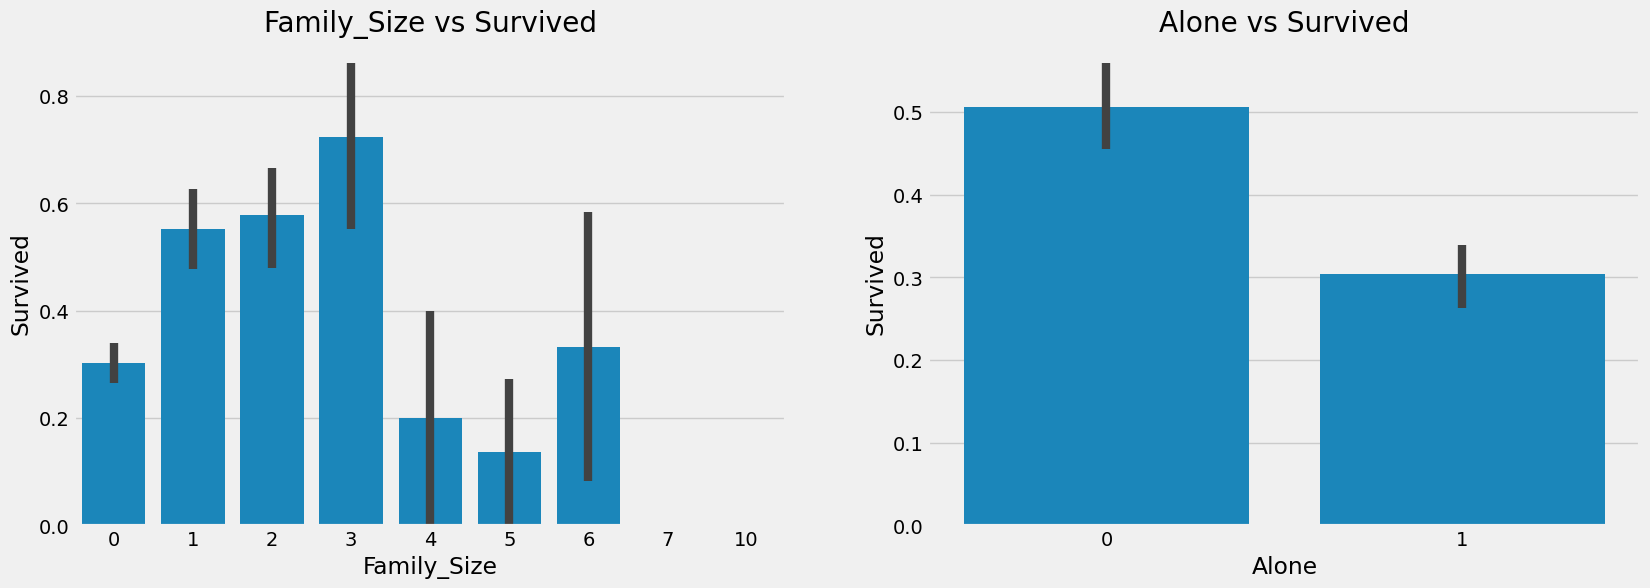

In [70]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.barplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.barplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

catplot은 오류가 생김ㅎ  

family_size = 0이라는건 혼자 탑승했다는 뜻이고, 혼자 탑승했을 때 생존율이 매우 적다는 것을 보여줌.  
가족이 4명 이상일 때에도 생존율 감소  

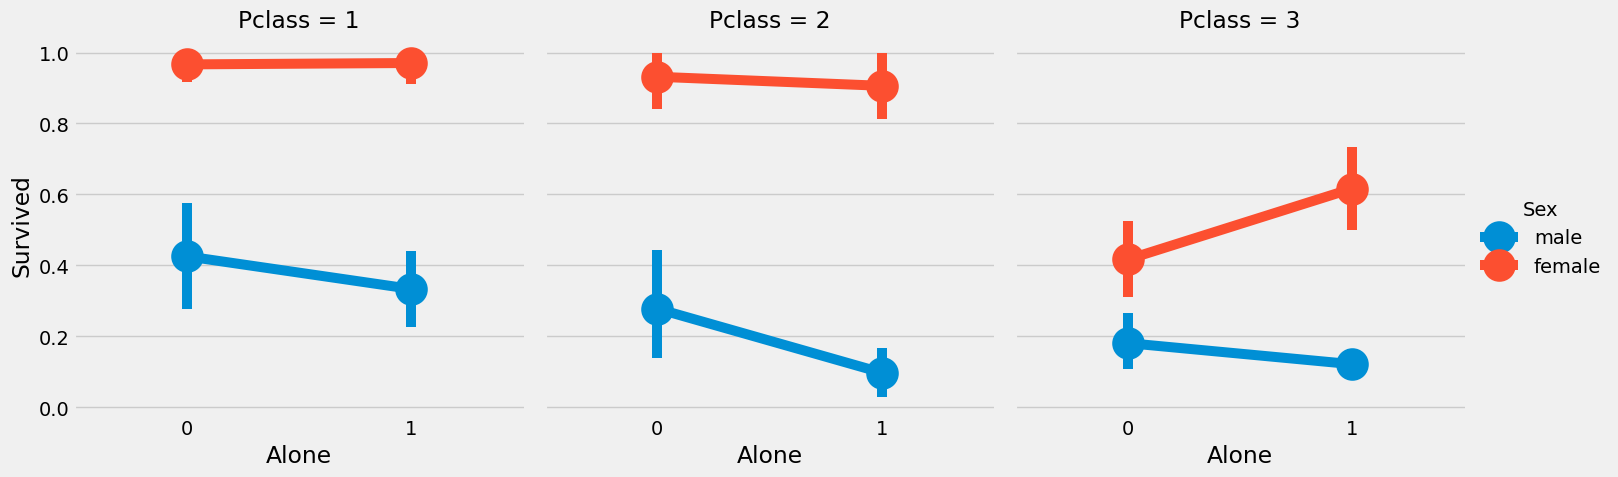

In [48]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

3등급일 때만 다른 경향

## Fare-Range

판다스의 qcut 이용(binning)

In [49]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


양의 상관관계??

In [50]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

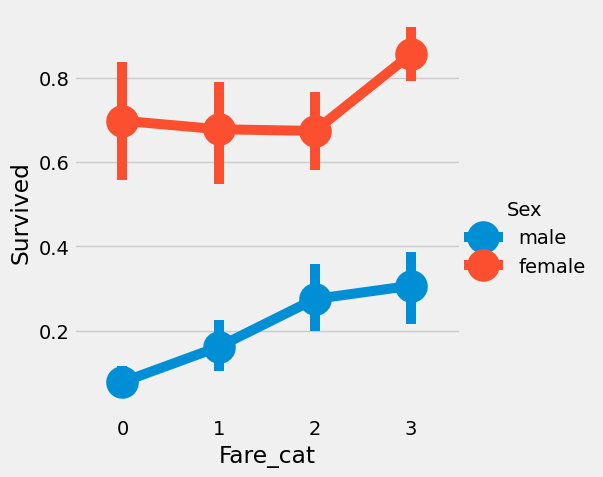

In [51]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex', kind='point')

plt.show()

성별로 나눠봐도 양의 상관관계

## Converting String Values into Numeric

In [52]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

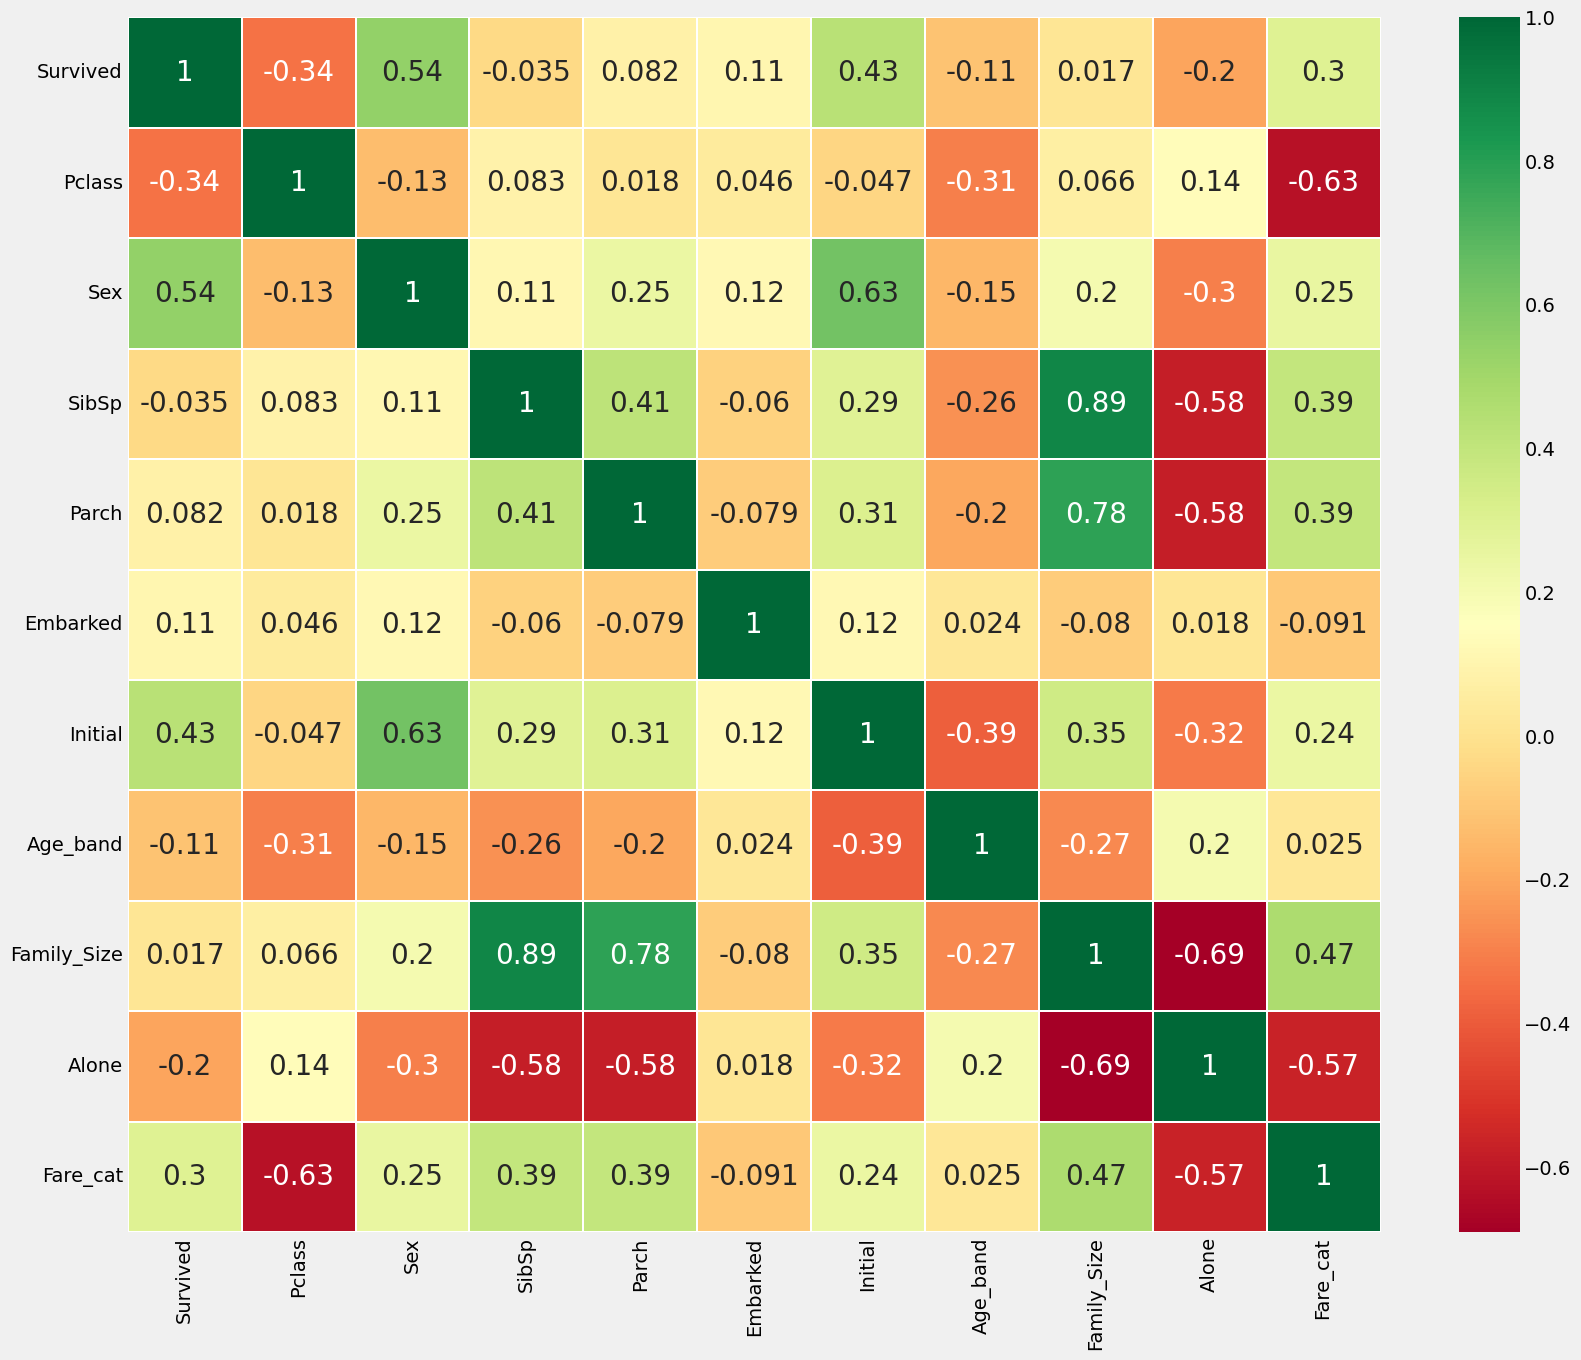

In [53]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

불필요한 중복 의미 피처 드롭하고 히트맵 그림  
양/음의 상관관계 가지는 피처들 확인 가능.  